In [1]:
%matplotlib inline
#%matplotlib notebook
import time
ts = time.time()
from modules.print_funcs import print_header, print_footer, print_midtime, print_endtime
print_header()
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from modules.constants import *


# Started at Mon, 08 Mar 2021 16:57:50 +0900 JST
# ===========================
# Python version:  3.7.0 (default, Jun 28 2018, 13:15:42)  [GCC 7.2.0]
# API version:  1013
# Platform:  linux
# ===========================


In [2]:
def get_crystal_structure_SALMON(fname):
    f = open(fname,'r')
    lines = f.readlines()
    f.close()
    Nlen = len(lines)
    print(Nlen, ': No. of lines of the file, ',fname)
    al = np.zeros(3,dtype='float64')
    for i in lines:
        index = i.find('natom')
        if (index > 0):
            natom = int(i.split('=')[1])
            print(natom)
        index = i.find(' al ')
        if (index > 0):
            temp = i.split('=')[1]
            temp = temp.replace(',', '')
            temp = temp.replace('d','e')
            al[0] = float(temp.split()[0])
            al[1] = float(temp.split()[1])
            al[2] = float(temp.split()[2])
    atomdict = {}
    xred = np.zeros(3,dtype='float64')
    xcart = np.zeros(3,dtype='float64')
    for i in range(Nlen):
        index = lines[i].find('atomic_red_coor')
        if (index > 0):
            for j in range(natom):
                atom = lines[i+j+1].split()[0]
                atom = atom.replace("'", "")
                xred[0]  = lines[i+j+1].split()[1]
                xred[1]  = lines[i+j+1].split()[2]
                xred[2]  = lines[i+j+1].split()[3]
                xcart = xred*al
                atomkindid = lines[i+j+1].split()[4]
                atomdict.update({str(j): [atom, xred, xcart, atomkindid]})
    return al, natom, atomdict

In [3]:
fname = "./input.inp"
al, natom, atomdict = get_crystal_structure_SALMON(fname)
print(al)
print(atomdict.keys())


93 : No. of lines of the file,  ./input.inp
18
[15.06935985  8.70029896  9.8398038 ]
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])


In [4]:
def plot_crystal_structure(al, natom, atomdict):
    #fig = plt.figure(figsize=(4, 8))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for iatom in range(natom):
        value = atomdict[str(iatom)]
        xcart = value[2]
        if (value[0]=='Si'):
            ax.scatter(xcart[0],xcart[1],xcart[2],c='r',s=120,marker="o")
        elif (value[0]=='O'):
            ax.scatter(xcart[0],xcart[1],xcart[2],c='g',s=80,marker="o")
    ax.plot([0.0, al[0]],[0.0, 0.0],[0.0, 0.0],'k--')
    ax.plot([0.0, 0.0],[0.0, al[1]],[0.0, 0.0],'k--')
    ax.plot([0.0, 0.0],[0.0, 0.0],[0.0, al[2]],'k--')
    ax.plot([0.0, al[0]],[al[1],al[1]],[0.0, 0.0],'k--')
    ax.plot([0.0, 0.0],[0.0, al[1]],[al[2],al[2]],'k--')
    ax.plot([al[0], al[0]],[0.0, 0.0],[0.0, al[2]],'k--')
    ax.plot([0.0, al[0]],[0.0, 0.0],[al[2],al[2]],'k--')
    ax.plot([al[0], al[0]],[0.0, al[1]],[0.0, 0.0],'k--')
    ax.plot([al[0], al[0]],[0.0, 0.0],[0.0, al[2]],'k--')
    ax.plot([0.0, 0.0],[al[1],al[1]],[0.0, al[2]],'k--')
    ax.plot([0.0, al[0]],[al[1],al[1]],[al[2],al[2]],'k--')
    ax.plot([al[0], al[0]],[0.0, al[1]],[al[2],al[2]],'k--')
    ax.plot([al[0], al[0]],[al[1],al[1]],[0.0, al[2]],'k--')
    #ax.set_xlim([-1.0, 6.8])
    #ax.set_ylim([-1.0, 6.8])
    #ax.set_zlim([-1.0, 6.8])
    ax.axis('equal')
    plt.show()

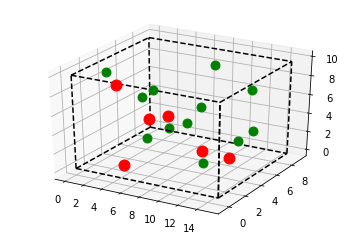

In [5]:
plot_crystal_structure(al, natom, atomdict)

In [6]:
rc = 3.4
bonddict = {}
k = 0
vec = np.zeros(3,dtype='float64')
for iatom in range(natom):
        value = atomdict[str(iatom)]
        atomi = value[0]
        xcart = value[2]
        for jatom in range(natom):
        #for jatom in range(iatom, natom):
            value = atomdict[str(jatom)]
            atomj = value[0]
            ycart = value[2]
            for ix in range(-1,2):
                for iy in range(-1,2):
                    for iz in range(-1,2):
                        vec[0] = ix*al[0] 
                        vec[1] = iy*al[1]
                        vec[2] = iz*al[2]
                        ycart = value[2] + vec
                        if ((np.linalg.norm(xcart - ycart) < rc)and(atomi != atomj)):
                            bonddict.update({str(k): [iatom, xcart, atomi, jatom, ix, iy, iz, ycart, atomj]})
                            print(atomi, atomj)
                            k += 1
                #print(atomi, atomj,'hit!')
                #print(iatom,jatom)
nbond = 1*k
print(nbond)
print(bonddict.keys())

Si O
Si O
Si O
Si O
Si O
Si O
Si O
Si O
Si O
Si O
Si O
Si O
O Si
O Si
O Si
O Si
O Si
O Si
O Si
O Si
O Si
O Si
O Si
O Si
Si O
Si O
Si O
Si O
Si O
Si O
Si O
Si O
Si O
Si O
Si O
Si O
O Si
O Si
O Si
O Si
O Si
O Si
O Si
O Si
O Si
O Si
O Si
O Si
48
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47'])


In [7]:
def plot_bonds(al, natom, atomdict, nbond, bonddict):
    #fig = plt.figure(figsize=(8, 4))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    bondsum = np.zeros(3,dtype='float64')
    for iatom in range(natom):
        value = atomdict[str(iatom)]
        xcart = value[2]
        if (value[0]=='Si'):
            ax.scatter(xcart[0],xcart[1],xcart[2],c='r',s=120,marker="o")
        elif (value[0]=='O'):
            ax.scatter(xcart[0],xcart[1],xcart[2],c='g',s=80,marker="o")
    for ibond in range(nbond):
        value = bonddict[str(ibond)]
        iatom = value[0]
        xcart = value[1]
        atomi = value[2]
        jatom = value[3]
        ix = value[4]
        iy = value[5]
        iz = value[6]
        ycart = value[7]
        atomj = value[8]
        #print(xcart, ycart)
        if ((atomi == 'Si')and(atomj == 'O')): #Si (xcart) <= O (ycart)
            dcart = -ycart + xcart       # xcart + dcart = ycart
            ax.quiver(ycart[0],ycart[1],ycart[2],dcart[0],dcart[1],dcart[2])
        elif ((atomi == 'O')and(atomj == 'Si')): #O (xcart) => Si (ycart)
            dcart = ycart - xcart      # xcart - dcart = ycart
            ax.quiver(xcart[0],xcart[1],xcart[2],dcart[0],dcart[1],dcart[2])
        else:
            print('Error')
        bonddict.update({str(ibond): [iatom, xcart, atomi, jatom, ix, iy, iz, ycart, atomj, dcart]})
        bondsum += dcart
    ax.plot([0.0, al[0]],[0.0, 0.0],[0.0, 0.0],'k--')
    ax.plot([0.0, 0.0],[0.0, al[1]],[0.0, 0.0],'k--')
    ax.plot([0.0, 0.0],[0.0, 0.0],[0.0, al[2]],'k--')
    ax.plot([0.0, al[0]],[al[1],al[1]],[0.0, 0.0],'k--')
    ax.plot([0.0, 0.0],[0.0, al[1]],[al[2],al[2]],'k--')
    ax.plot([al[0], al[0]],[0.0, 0.0],[0.0, al[2]],'k--')
    ax.plot([0.0, al[0]],[0.0, 0.0],[al[2],al[2]],'k--')
    ax.plot([al[0], al[0]],[0.0, al[1]],[0.0, 0.0],'k--')
    ax.plot([al[0], al[0]],[0.0, 0.0],[0.0, al[2]],'k--')
    ax.plot([0.0, 0.0],[al[1],al[1]],[0.0, al[2]],'k--')
    ax.plot([0.0, al[0]],[al[1],al[1]],[al[2],al[2]],'k--')
    ax.plot([al[0], al[0]],[0.0, al[1]],[al[2],al[2]],'k--')
    ax.plot([al[0], al[0]],[al[1],al[1]],[0.0, al[2]],'k--')
    #ax.set_xlim([-1.0, 6.8])
    #ax.set_ylim([-1.0, 6.8])
    #ax.set_zlim([-1.0, 6.8])
    ax.axis('equal')
    plt.show()
    print('bondsum', bondsum)
    return bonddict

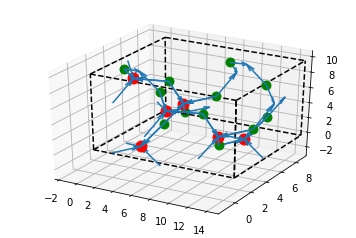

bondsum [ 8.43769499e-15 -6.66133815e-16  1.42108547e-14]


In [8]:
bonddict = plot_bonds(al, natom, atomdict, nbond, bonddict)


In [9]:
def E2Eabs(nbond, bonddict,E,npower):
    Eabs = 0.0
    for ibond in range(nbond):
        value = bonddict[str(ibond)]
        dcart = value[9]
        Edotdcart = np.abs(np.dot(E, dcart)/np.linalg.norm(dcart))
        Eabs += (Edotdcart)**npower
    return Eabs
def thetaphi2E(theta, phi):
    E = np.zeros(3, dtype='float64')
    E[0] = np.sin(theta)*np.cos(phi)
    E[1] = np.sin(theta)*np.sin(phi)
    E[2] = np.cos(theta)
    return E
def calc_Eabs_theta_phi(nbond, bondict, npower):
    Nphi = 19
    Ntheta = 19
    theta = np.linspace(0.0,0.25,Ntheta,dtype='float64')
    phi = np.linspace(0.0,0.25,Nphi,dtype='float64')
    theta = theta*tpi
    phi = phi*tpi
    Eabstheta = np.zeros(Ntheta,dtype='float64')
    Eabsphi = np.zeros(Nphi,dtype='float64')
    for itheta in range(Ntheta):
        E = thetaphi2E(theta[itheta],phi[0])
        Eabstheta[itheta] = E2Eabs(nbond, bonddict,E,npower)
    for iphi in range(Nphi):
        E = thetaphi2E(theta[Ntheta-1],phi[iphi])
        Eabsphi[iphi] = E2Eabs(nbond,bonddict,E,npower)
    return theta, Eabstheta, phi, Eabsphi


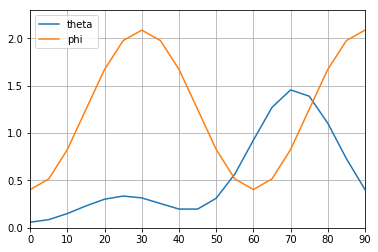

In [10]:
npower = 24
theta, Eabstheta, phi, Eabsphi = calc_Eabs_theta_phi(nbond, bonddict, npower)
plt.figure()
plt.xlim(0.0,90.0)
plt.ylim(0.0,1.1*max(np.amax(Eabstheta),np.amax(Eabsphi)))
plt.plot(theta/tpi*360,Eabstheta,label='theta')
plt.plot(phi/tpi*360,Eabsphi,label='phi')
plt.grid()
plt.legend()
plt.show()